<a href="https://colab.research.google.com/github/JibbyGeorge-DB/HuggingFace/blob/main/HuggingFace_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HuggingFace Pipelines


In [ ]:
!pip install -q --upgrade datasets==3.6.0
!pip install transformers

In [1]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Sat Jan 10 02:36:18 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Imports

import torch                      # The core PyTorch library used for tensor computations and running the deep learning models.
from google.colab import userdata # A Colab-specific tool used to securely access your stored "Secrets" (like API keys) without hardcoding them.
from huggingface_hub import login # Functionality to authenticate your environment with Hugging Face to access private or gated models (like Llama or SD3).
from transformers import pipeline # The easiest way to use pre-trained models for NLP or Audio tasks (like speech-to-text or sentiment analysis).
from diffusers import DiffusionPipeline # The primary class used to load and run image-generation models like Stable Diffusion or Flux.
from datasets import load_dataset # A utility to quickly download and prepare large-scale community datasets for training or evaluation.
import soundfile as sf            # A library for reading and writing audio files, often used to save generated speech or music to your disk.
from IPython.display import Audio # A helper that creates an interactive audio player directly inside your notebook cells.

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


While "Sentiment Analysis" is the most common use case, it is technically a subset of the broader Text Classification task in the Transformers library.

In [ ]:
# Sentiment Analysis
#Model will be automatically selected in Colab if no model is mentioned

sentiment_analyzer = pipeline("sentiment-analysis",  device_map="auto")
result = sentiment_analyzer("Im super excited to be here")
print(result)

In [ ]:
#Text Generation

pipe = pipeline("text-generation", model="Qwen/Qwen2.5-0.5B-Instruct", device_map="auto")

user_message = """
What are some fun activities I can do in Melbourne, Australia?
"""
result = pipe(user_message)
print(result[0]['generated_text'])

In [ ]:
# Translation
# Translating to French

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es", device_map="auto")
text_translated = translator("Hello Good Morning",
                             src_lang="eng_Latn",
                             tgt_lang="fra_Latn")
print (text_translated)


Device set to use cuda:0


[{'translation_text': 'Buenos días.'}]


In [ ]:
#Text Summarization
summarizer = pipeline("summarization", device_map="auto")
text = """
Self-hosting large language models (LLMs) on Kubernetes is gaining momentum among organizations with inference workloads at scale, such as batch processing, chatbots, agents, and AI-driven applications. These organizations often have access to commercial-grade GPUs and are seeking alternatives to costly per-token API pricing models, which can quickly scale out of control. Many also require the ability to fine-tune or customize their models, a capability typically restricted by closed-source API providers. Additionally, companies handling sensitive or proprietary data - especially in regulated sectors such as finance, healthcare, or defense - prioritize self-hosting to maintain strict control over data and prevent exposure through third-party systems.
To address these needs and more, the Kubernetes AI Toolchain Operator (KAITO), a Cloud Native Computing Foundation (CNCF) Sandbox project, simplifies the process of deploying and managing open-source LLM workloads on Kubernetes. KAITO integrates with vLLM, a high-throughput inference engine designed to serve large language models efficiently. vLLM as an inference engine helps reduce memory and GPU requirements without significantly compromising accuracy.
Built on top of the open-source KAITO project, the AI toolchain operator managed add-on offers a modular, plug-and-play setup that allows teams to quickly deploy models and expose them via production-ready APIs. It includes built-in features like OpenAI-compatible APIs, prompt formatting, and streaming response support. When deployed on an AKS cluster, KAITO ensures data stays within your organization’s controlled environment, providing a secure, compliant alternative to cloud-hosted LLM APIs.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


 Self-hosting large language models (LLMs) on Kubernetes is gaining momentum among organizations with inference workloads at scale . KAITO integrates with vLLM, a high-throughput inference engine designed to


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

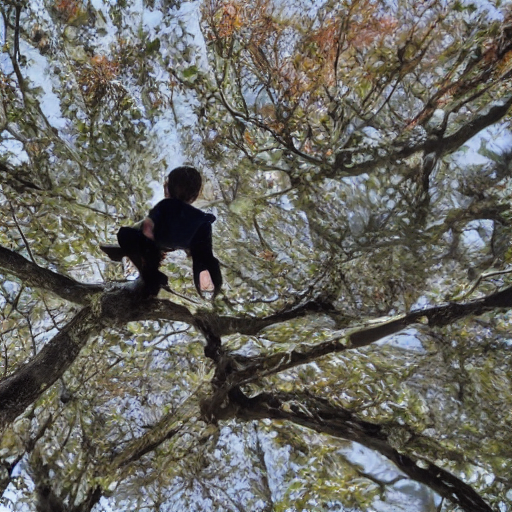

In [6]:
#Image Generation
# In PyTorch and the Hugging Face diffusers/transformers libraries, torch_dtype=torch.float16 tells the computer how much precision (and memory)
# to use when storing the "weights" of the AI model.

# use_safetensors=True tells the library to load the model using a secure, modern file format (.safetensors)
# instead of the traditional, risky PyTorch format (.bin or .pt).

from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16, # Corrected back to torch_dtype
    use_safetensors=True,
)

pipe.to("cuda") # Explicitly move the pipeline to GPU

prompt = "a photo of a boy climbing the tree"

#Generate the image
image = pipe(
    prompt=prompt,
    num_inference_steps=4,
    guidance_scale=0.0
).images[0]

display(image)